# Chapter 5 Exercises

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(fig_id, tight_layout=True):
    path = os.path.join("images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
import pandas as pd

DATA_PATH='data'

def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "banana.csv")
    return pd.read_csv(csv_path)

In [4]:
data = load_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 3 columns):
atr1     5300 non-null float64
atr2     5300 non-null float64
label    5300 non-null int64
dtypes: float64(2), int64(1)
memory usage: 124.3 KB


In [5]:
data.head()

,atr1,atr2,label
0,1.140,-0.114,-1
1,-1.520,-1.150,1
2,-1.050,0.720,-1
3,-0.916,0.397,1
4,-1.090,0.437,1


In [6]:
corr_matrix = data.corr()

In [7]:
corr_matrix["label"].sort_values(ascending=False)

label    1.000000
atr1    -0.059570
atr2    -0.068791
Name: label, dtype: float64

In [28]:
y = (data['label']).copy()

In [29]:
y.head()

0   -1
1    1
2   -1
3    1
4    1
Name: label, dtype: int64

In [30]:
X = (data[['atr1', 'atr2']]).copy()

In [31]:
X.head()

,atr1,atr2
0,1.140,-0.114
1,-1.520,-1.150
2,-1.050,0.720
3,-0.916,0.397
4,-1.090,0.437


In [12]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=0.001, loss="hinge", random_state=42)),
    ))

rbf_kernel_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
        ))

rbf_kernel_svm_clf.fit(X, y)
svm_clf.fit(X, y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))))

In [13]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=5, coef0=100, C=5))
    ))

polynomial_svm_clf.fit(X, y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape=None, degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

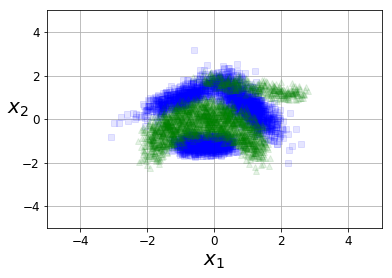

In [14]:
# from book
def plot_dataset(X, y, axes):
    plt.plot(X['atr1'][y==-1], X['atr2'][y==-1], "bs", alpha=0.1)
    plt.plot(X['atr1'][y==1], X['atr2'][y==1], "g^", alpha=0.1)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-5, 5, -5, 5])
plt.show()

Saving figure linear_svc


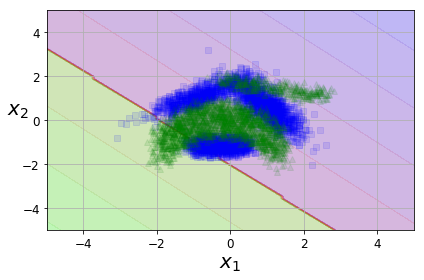

In [32]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_predictions(svm_clf, [-5, 5, -5, 5])
plot_dataset(X, y, [-5, 5, -5, 5])
save_fig("linear_svc")
plt.show()

Linear model is under-fitting badly

Saving figure rbf_svc


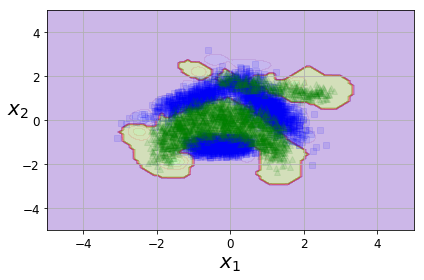

In [37]:
plot_predictions(rbf_kernel_svm_clf, [-5, 5, -5, 5])
plot_dataset(X, y, [-5, 5, -5, 5])
save_fig("rbf_svc")
plt.show()

RBF kernel SVC is better, but perhaps overfitting, hard to determine

Saving figure poly_svc


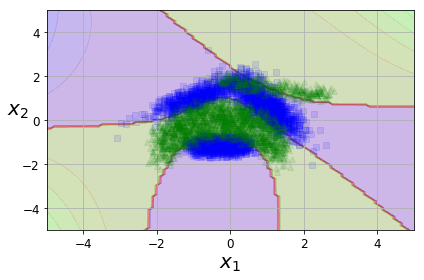

In [38]:
plot_predictions(polynomial_svm_clf, [-5, 5, -5, 5])
plot_dataset(X, y, [-5, 5, -5, 5])
save_fig("poly_svc")
plt.show()

Poly kernel SVC seems like the best model for generalization

In [20]:
from sklearn.metrics import accuracy_score

y_pred_lin = svm_clf.predict(X)
y_pred_rbf = rbf_kernel_svm_clf.predict(X)
y_pred_poly = polynomial_svm_clf.predict(X)
print(accuracy_score(y, y_pred_lin))
print(accuracy_score(y, y_pred_rbf))
print(accuracy_score(y, y_pred_poly))

0.575849056604
0.913773584906
0.890377358491


However, rbf gives greatest accuracy, although it still may be overfitting

Exercise: train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [33]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X2, y2 = mnist["data"], mnist["target"]

In [34]:
X_train = X2[:60000]
y_train = y2[:60000]
X_test = X2[60000:]
y_test = y2[60000:]

In [35]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [25]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [26]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.87038333333333329